In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from matplotlib import cm

In [ ]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = pd.Categorical.from_codes(wine.target, wine.target_names)

print(df_wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline   target  
0         

In [4]:
X_all = wine.data
y_all = wine.target
feature_names = wine.feature_names

In [ ]:
class KMeansClustering:

    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        diff = centroids - data_point
        return np.sqrt(np.sum(diff*diff, axis=1))

    def fit(self, X, max_iterations = 200):
        self.centroids = np.random.uniform(np.amin(X, axis = 0), np.amax(X, axis=0), size=(self.k, X.shape[1]))

        for _ in range(max_iterations):
            y = []

            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)
        
            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis = 0)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)
        
        return y

Average silhouette score: 0.481


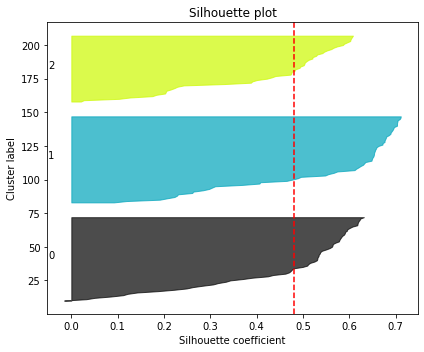

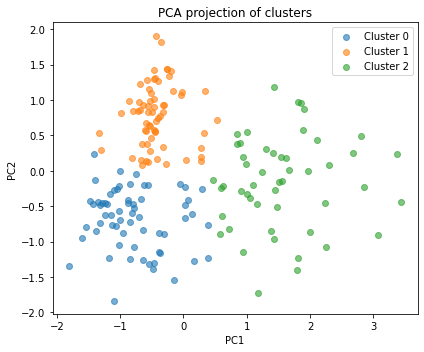

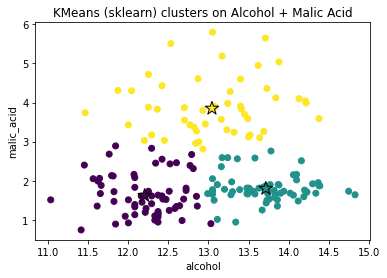

Average silhouette score: 0.565


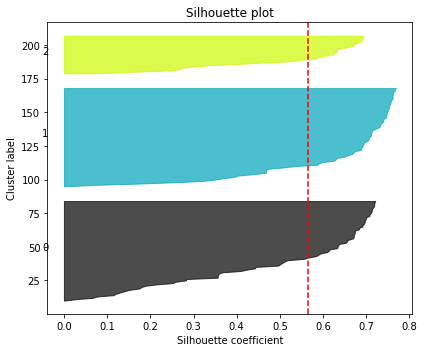

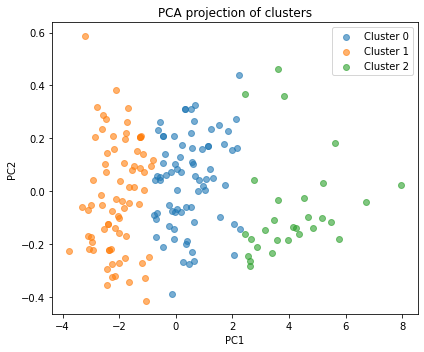

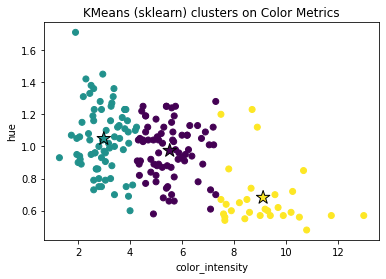

In [ ]:
feature_sets = {
    "Alcohol + Malic Acid": ["alcohol", "malic_acid"],
    "Color Metrics": ["color_intensity", "hue"],
}

for set_name, feats in feature_sets.items():
    indices = [feature_names.index(f) for f in feats]
    X = X_all[:, indices]
    
    kmeans = KMeansClustering(k=3)
    labels = kmeans.fit(X)

    # Average silhouette score
    sil_avg = silhouette_score(X, labels)
    print(f"Average silhouette score: {sil_avg:.3f}")

    # Silhouette plot
    sil_vals = silhouette_samples(X, labels)
    fig, ax1 = plt.subplots(figsize=(6,5))
    y_lower = 10
    for i in range(kmeans.k):
        ith_sil = np.sort(sil_vals[labels == i])
        size_cluster = ith_sil.shape[0]
        y_upper = y_lower + size_cluster
        color = cm.nipy_spectral(float(i) / kmeans.k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_sil,
                        facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5*size_cluster, str(i))
        y_lower = y_upper + 10
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()

    # PCA scatter
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    fig, ax2 = plt.subplots(figsize=(6,5))
    for i in range(kmeans.k):
        pts = X_pca[labels == i]
        ax2.scatter(pts[:,0], pts[:,1], label=f"Cluster {i}", alpha=0.6)
    ax2.set_title("PCA projection of clusters")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.legend()
    plt.tight_layout()
    plt.show()

    plt.scatter(X[:, 0], X[:, 1], c = labels)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c = range(len(kmeans.centroids)), marker="*", s=200, edgecolor='k')
    plt.xlabel(feats[0])
    plt.ylabel(feats[1])
    plt.title(f"KMeans (sklearn) clusters on {set_name}")
    plt.show()

## SCIKIT LEARN

Average silhouette score: 0.481


AttributeError: 'KMeans' object has no attribute 'k'

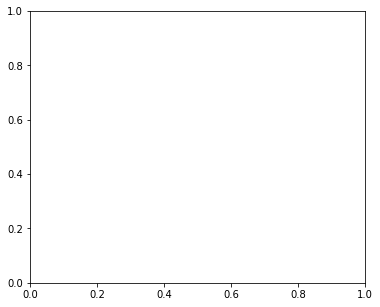

In [ ]:
for set_name, feats in feature_sets.items():
    indices = [list(feature_names).index(f) for f in feats]
    X = X_all[:, indices]
    
    kmeans = KMeans(n_clusters=3, n_init=10)
    labels = kmeans.fit_predict(X)

    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)
    
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker='*', s=200,
        c=range(kmeans.n_clusters),
        cmap='tab10',
        edgecolor='k',
        linewidth=1.5
    )

    plt.xlabel(feats[0])
    plt.ylabel(feats[1])
    plt.title(f"KMeans (sklearn) clusters on {set_name}")
    plt.tight_layout()
    plt.show()

Alcohol + Malic Acid: 2 clusters, 9 noise points


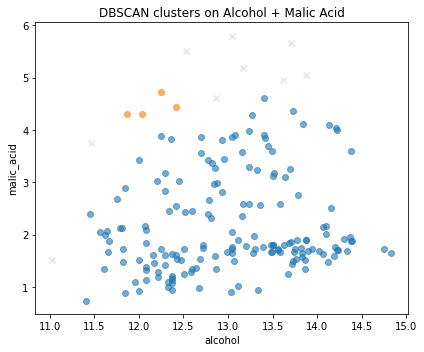

Color Metrics: 1 clusters, 2 noise points


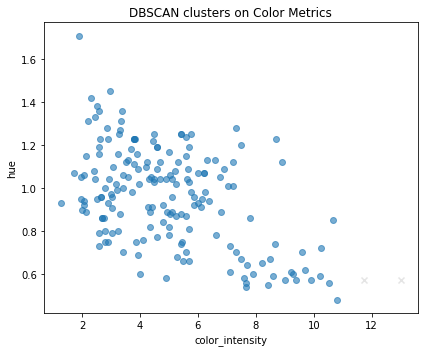

In [ ]:
for set_name, feats in feature_sets.items():
    idx = [list(feature_names).index(f) for f in feats]
    X = X_all[:, idx]

    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"{set_name}: {n_clusters} clusters, {np.sum(labels==-1)} noise points")

    plt.figure(figsize=(6,5))
    unique_labels = sorted(set(labels))
    cmap = plt.get_cmap("tab10")

    for lbl in unique_labels:
        mask = labels == lbl
        if lbl == -1:
            # noise
            plt.scatter(X[mask,0], X[mask,1],
                        c='lightgray', marker='x',
                        label='Noise', alpha=0.6)
        else:
            plt.scatter(X[mask,0], X[mask,1],
                        c=[cmap(lbl % 10)],
                        label=f'Cluster {lbl}', alpha=0.6)

    plt.xlabel(feats[0])
    plt.ylabel(feats[1])
    plt.title(f"DBSCAN clusters on {set_name}")
    plt.tight_layout()
    plt.show()